Libraries

In [1]:
# file operations
import os
# to list files
import glob

from tensorflow import keras

# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical, plot_model
# process image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# callback functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

2023-10-24 09:13:10.563497: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 09:13:10.563559: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-24 09:13:10.564231: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-24 09:13:10.658651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Data

List Files

In [2]:
# list of files in the dataset
os.listdir('/mnt/d/cell_images')

['Parasitized', 'Uninfected']

In [3]:
# list all the images in the directory Parasitized
parasitized = glob.glob('/mnt/d/cell_images/Parasitized/*.png')

# no. of files in the directory Parasitized
print('No. of files in the directory Parasitized', len(parasitized))

# first few images
parasitized[:5]

No. of files in the directory Parasitized 13779


['/mnt/d/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png',
 '/mnt/d/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png',
 '/mnt/d/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png',
 '/mnt/d/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png',
 '/mnt/d/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png']

In [5]:
# list all the images in the directory Uninfected
uninfected = glob.glob('/mnt/d/cell_images/Uninfected/*.png')

# no. of files in the directory Uninfected
print('No. of files in the directory Uninfected', len(uninfected))

# first few images
uninfected[:5]

No. of files in the directory Uninfected 13779


['/mnt/d/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png',
 '/mnt/d/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png',
 '/mnt/d/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_144.png',
 '/mnt/d/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_21.png',
 '/mnt/d/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png']

Images

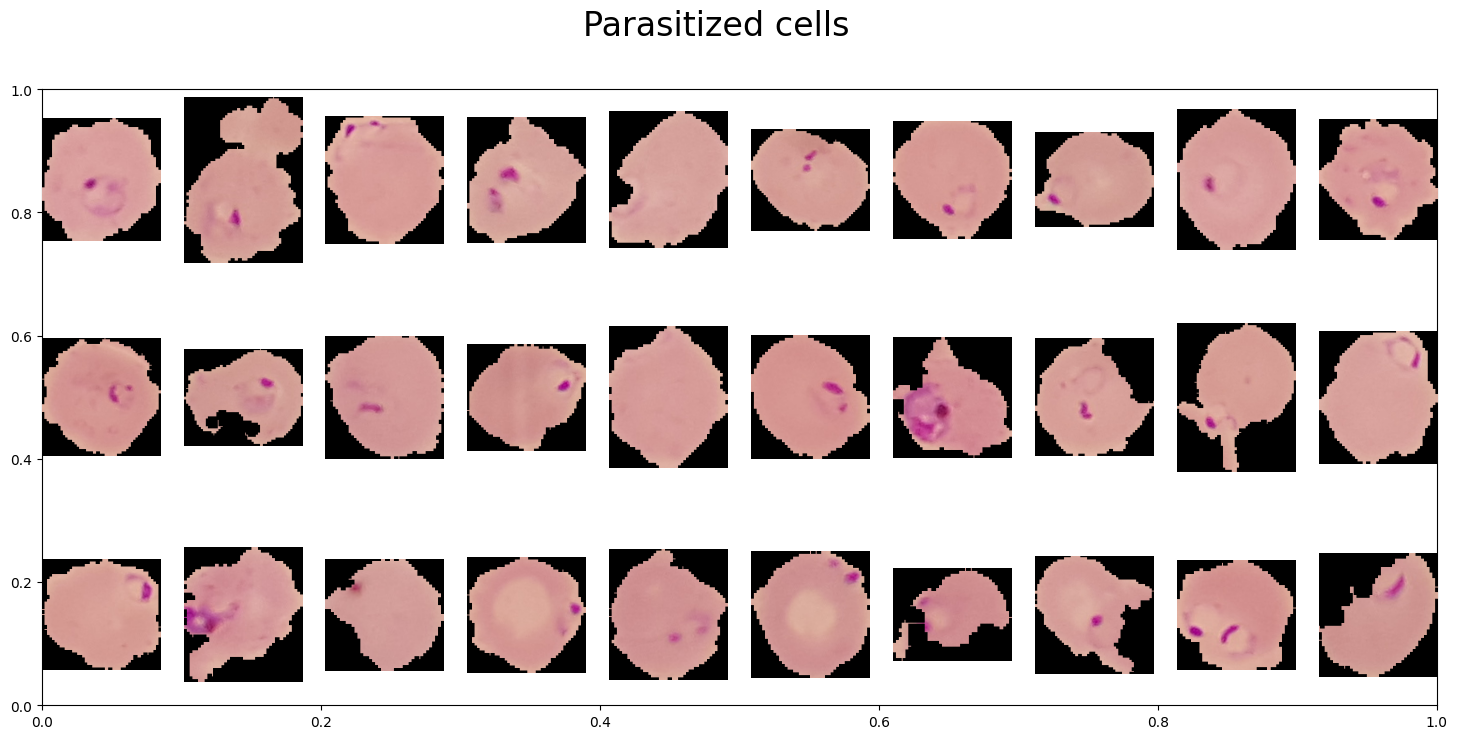

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Parasitized cells', fontsize=24)

for ind, img_src in enumerate(parasitized[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

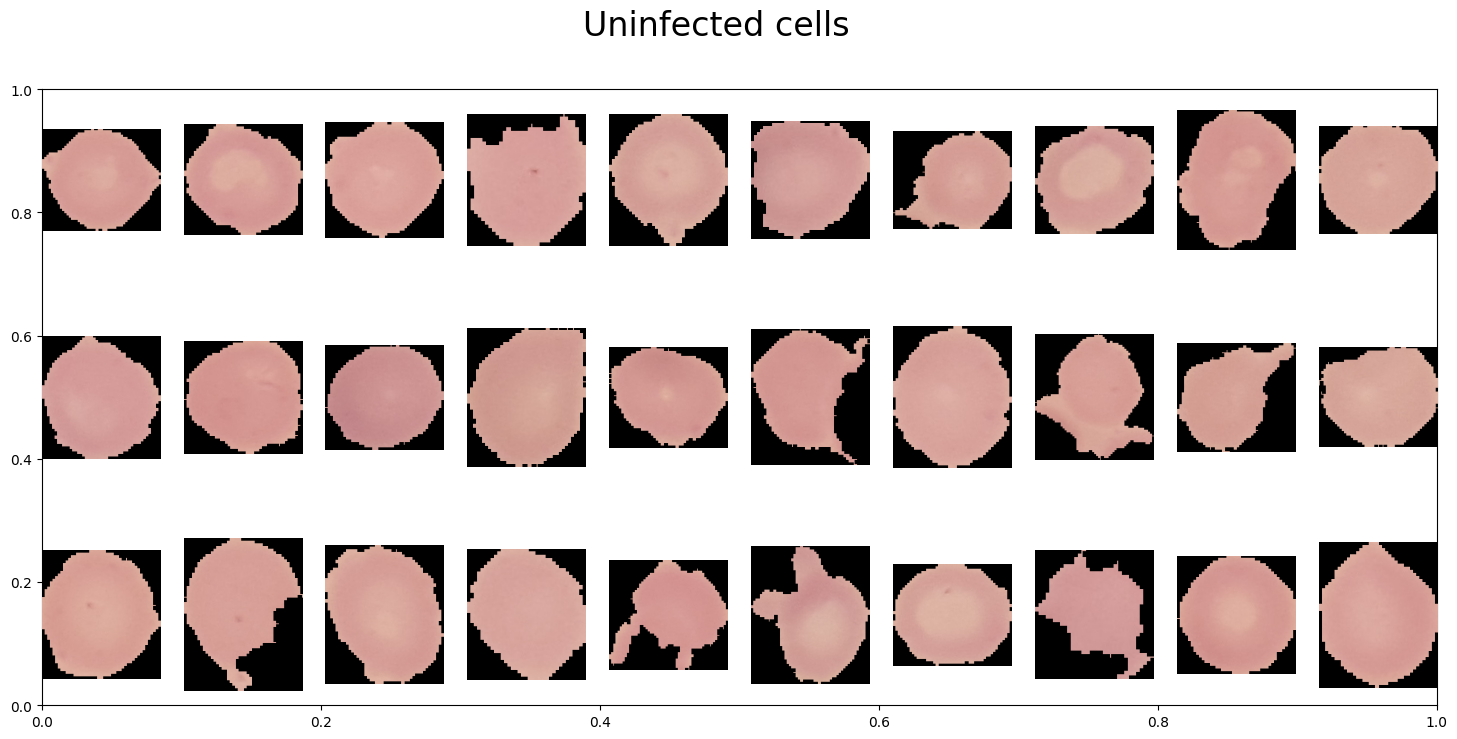

In [7]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Uninfected cells', fontsize=24)

for ind, img_src in enumerate(uninfected[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

Model

Model Parameters

In [8]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels
TARGET_SIZE = 64  # Format 2D images
EPOCHS = 10       # Number of passes a training dataset takes around an alogirthm 

Model initialization

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3))) # Number of filters in a convolutional layer
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu')) # Creates a convolution kernel to produce a tensor of outputs
model.add(MaxPooling2D(2,2)) # Calculates the largest of max value in every patch

model.add(Conv2D(128, (3,3), activation='relu')) # ReLU is suitable for hidden layers, as it stops the inactive neurons
model.add(MaxPooling2D(2,2))

model.add(Flatten()) # Connect CNN's to ANN'S allowing the neural nets models to learn complex patterns and make predictions

model.add(Dropout(0.2)) # Deactivating a portion of input units during each training update
model.add(Dense(128, activation='relu')) # Layer of neurons which each neuron receives input from all the neurons of previous layer

model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid')) # Sigmoid is useful for output layers, as it can represent the probability of binary class. 

model.compile(optimizer='adam', # optimization alogrithm for neural nets training
              loss='binary_crossentropy', # model metric that atracks incorrect labeling of the data class by a model
              metrics=['accuracy']) # Model score / performs across all classes

model.summary()

2023-10-24 09:13:24.217235: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-24 09:13:24.239965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-24 09:13:24.240014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-24 09:13:24.242760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-24 09:13:24.242810: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

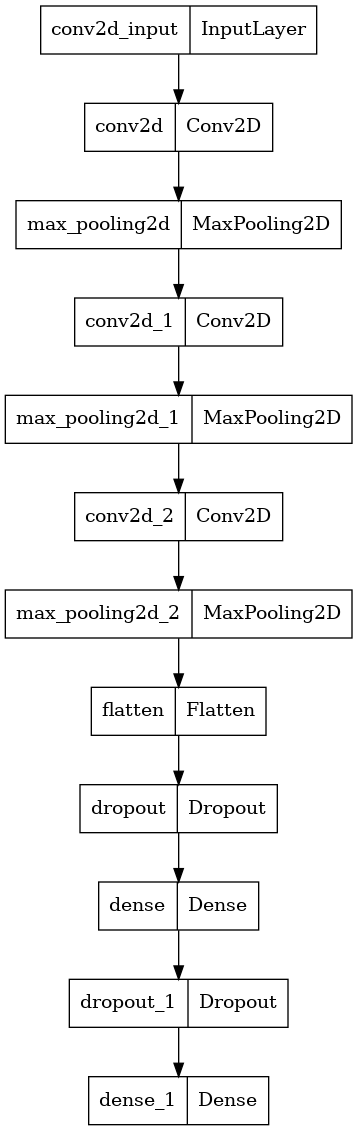

<Figure size 500x1000 with 0 Axes>

In [10]:
plt.figure(figsize=(5, 10))
plot_model(model, to_file="model.png")

Data Generator

In [11]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.3)

train_data = datagen.flow_from_directory('/mnt/d/cell_images',
                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         class_mode='binary',
                                         subset='training')

validation_data = datagen.flow_from_directory('/mnt/d/cell_images',
                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              class_mode='binary',
                                              subset='validation')

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


Callback Functions

In [12]:
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta = 0.01,
                               patience=5)

# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

Fit model

In [13]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[early_stopping, model_save])

Epoch 1/10


2023-10-24 09:13:32.906975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-24 09:13:34.826462: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-24 09:13:35.509752: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-24 09:13:36.276666: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe6300a9d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-24 09:13:36.276723: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-10-24 09:13:36.285059: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-24 09:13:36.360189: I ./tensorflow/compiler/jit/

193/193 [==============================] - 371s 2s/step - loss: 0.6826 - accuracy: 0.6062 - val_loss: 0.6372 - val_accuracy: 0.8533
Epoch 2/10


/home/kev/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


193/193 [==============================] - 244s 1s/step - loss: 0.3736 - accuracy: 0.8719 - val_loss: 0.2527 - val_accuracy: 0.9026
Epoch 3/10
193/193 [==============================] - 222s 1s/step - loss: 0.2571 - accuracy: 0.9133 - val_loss: 0.2251 - val_accuracy: 0.9163
Epoch 4/10
193/193 [==============================] - 179s 929ms/step - loss: 0.2326 - accuracy: 0.9224 - val_loss: 0.2219 - val_accuracy: 0.9166
Epoch 5/10
193/193 [==============================] - 233s 1s/step - loss: 0.2212 - accuracy: 0.9267 - val_loss: 0.2211 - val_accuracy: 0.9133
Epoch 6/10
193/193 [==============================] - 226s 1s/step - loss: 0.2135 - accuracy: 0.9301 - val_loss: 0.2184 - val_accuracy: 0.9173
Epoch 7/10
193/193 [==============================] - 312s 2s/step - loss: 0.2046 - accuracy: 0.9318 - val_loss: 0.2543 - val_accuracy: 0.9188
Epoch 8/10
193/193 [==============================] - 263s 1s/step - loss: 0.2085 - accuracy: 0.9314 - val_loss: 0.2084 - val_accuracy: 0.9226
Epoch 9

Plot metrics

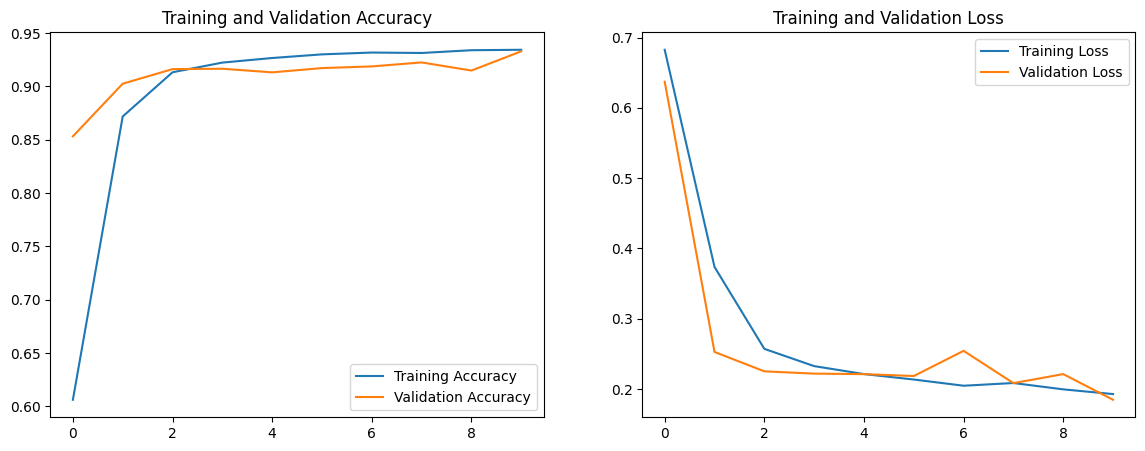

In [16]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()